In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/sample_submission.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=4/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=3/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=1/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=8/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=2/part-0.parquet
/kaggle/input/jane-street-real-time-market

In [3]:
##Reading the features and responder csv files to understand the dataset
# Load the dataset
features_data = pd.read_csv('/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv')
responders_data =  pd.read_csv('/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv')
# Display the first few rows of the dataset


In [4]:
#Get the length of the features_data and responders_data ###
len(features_data)
len(responders_data)

9

In [ ]:
features_data.head(10)

In [ ]:
responders_data.head(10)

In [ ]:
## The Problem solving for the dataset starts from here starting with installing the right packages ###
######################################################################################################

In [1]:
!pip install polars

ERROR: Could not find a version that satisfies the requirement polars (from versions: none)
ERROR: No matching distribution found for polars


In [ ]:

import pandas as pd
import polars as pl
train = \
pl.scan_parquet(
    f"/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet"
).\
select(
    pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
    pl.all(),
).collect()

# Read the parquet file and convert to pandas dataframe
# Slice to only get the first 40,000 rows
train_df = train.to_pandas().iloc[:950000]
#In a similar manner i can read the test files
test = \
pl.scan_parquet(
    f"/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet"
).\
select(
    pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
    pl.all(),
).collect()
test_df = test.to_pandas().iloc[:950000]



In [7]:
##reading the training daatset by partitions :
import pandas as pd
train_df = pd.read_parquet('/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=0/part-0.parquet')
train_df.head(10)

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000
5,0,0,16,1.118269,NaN,NaN,NaN,NaN,NaN,1.092428,...,-0.189784,0.505199,0.035095,-1.976849,1.335720,-1.215543,-1.593503,0.840550,0.246794,-0.101013
6,0,0,19,2.456331,NaN,NaN,NaN,NaN,NaN,0.747231,...,-0.187166,0.096462,-0.252154,-0.002623,-1.002823,-0.632378,0.112727,-0.807892,-0.704062,0.184303
7,0,0,33,1.663408,NaN,NaN,NaN,NaN,NaN,1.182569,...,-0.171215,0.209253,0.182766,0.010843,1.409293,0.002821,0.147636,0.965387,-0.263765,0.280629
8,0,1,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.917613,...,-0.301006,0.808660,-0.105820,1.493438,1.387199,0.095372,1.163139,0.751976,0.348024,0.041855
9,0,1,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.877172,...,-0.294585,3.119074,1.524680,-0.080976,4.015586,2.337222,5.000000,0.635277,0.009769,0.251455


In [23]:
#lets read the test dataframe which can be used to make predictions and it will help to understand how can i move forward
#In a similar manner i can read the test files
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

# Define a schema that matches your dataset
schema = pa.schema([
    ('date_id', pa.int32()),  # Set date_id explicitly as int32
    # Add other fields here, matching their expected types from the dataset
])

# Read the parquet file using the defined schema
try:
    test_table = pq.read_table('/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet', schema=schema)
    test_df = test_table.to_pandas()  # Convert to pandas DataFrame
except pa.ArrowInvalid as e:
    print(f"Schema mismatch error: {e}")


In [26]:
# Try using fastparquet engine
test_df = pd.read_parquet('/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet', engine='fastparquet')


In [27]:
test_df.columns

Index(['row_id', 'time_id', 'symbol_id', 'weight', 'is_scored', 'feature_00',
       'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60'

In [8]:
print(len(train_df))


1944210


In [ ]:
len(test_df)

In [9]:
#Lets understand the train_df 
train_df.describe()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
count,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,0.0,0.0,0.0,0.0,0.0,1.944210e+06,...,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06
mean,9.384629e+01,4.240000e+02,1.376638e+01,1.973281e+00,NaN,NaN,NaN,NaN,NaN,-4.463175e-02,...,-9.805073e-02,8.424639e-03,1.076465e-02,2.412764e-03,1.139089e-02,2.185480e-02,3.326982e-03,1.487634e-03,-4.817980e-04,1.078154e-03
std,4.813196e+01,2.450851e+02,1.108778e+01,9.691969e-01,NaN,NaN,NaN,NaN,NaN,9.479579e-01,...,6.398993e-01,9.558780e-01,1.141793e+00,8.442027e-01,1.276044e+00,1.266448e+00,1.225165e+00,8.705768e-01,8.918150e-01,8.737320e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,4.405696e-01,NaN,NaN,NaN,NaN,NaN,-1.176608e+01,...,-3.393299e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00
25%,5.400000e+01,2.120000e+02,7.000000e+00,1.323803e+00,NaN,NaN,NaN,NaN,NaN,-4.756072e-01,...,-3.195696e-01,-2.322211e-01,-2.667868e-01,-1.210319e-01,-4.444537e-01,-5.146699e-01,-2.569897e-01,-3.558709e-01,-3.914038e-01,-2.892584e-01
50%,9.900000e+01,4.240000e+02,1.200000e+01,1.763827e+00,NaN,NaN,NaN,NaN,NaN,-5.818180e-02,...,-2.468792e-01,-3.943805e-03,-2.333469e-02,-1.248489e-03,-1.031224e-02,-1.836913e-02,-4.690550e-03,-9.597129e-03,-2.376243e-02,-3.107830e-04
75%,1.360000e+02,6.360000e+02,1.700000e+01,2.393846e+00,NaN,NaN,NaN,NaN,NaN,3.493771e-01,...,-1.256560e-01,2.309678e-01,2.538152e-01,1.191232e-01,4.292141e-01,5.065366e-01,2.438874e-01,3.360999e-01,3.463979e-01,2.840819e-01
max,1.690000e+02,8.480000e+02,3.800000e+01,6.011999e+00,NaN,NaN,NaN,NaN,NaN,1.532000e+01,...,4.370195e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [10]:
##lets check the null values in the train df
train_df.isnull().sum()

date_id              0
time_id              0
symbol_id            0
weight               0
feature_00     1944210
                ...   
responder_4          0
responder_5          0
responder_6          0
responder_7          0
responder_8          0
Length: 92, dtype: int64

In [11]:
#lets train a simple model on to understand how its working
print(train_df.columns)

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_6

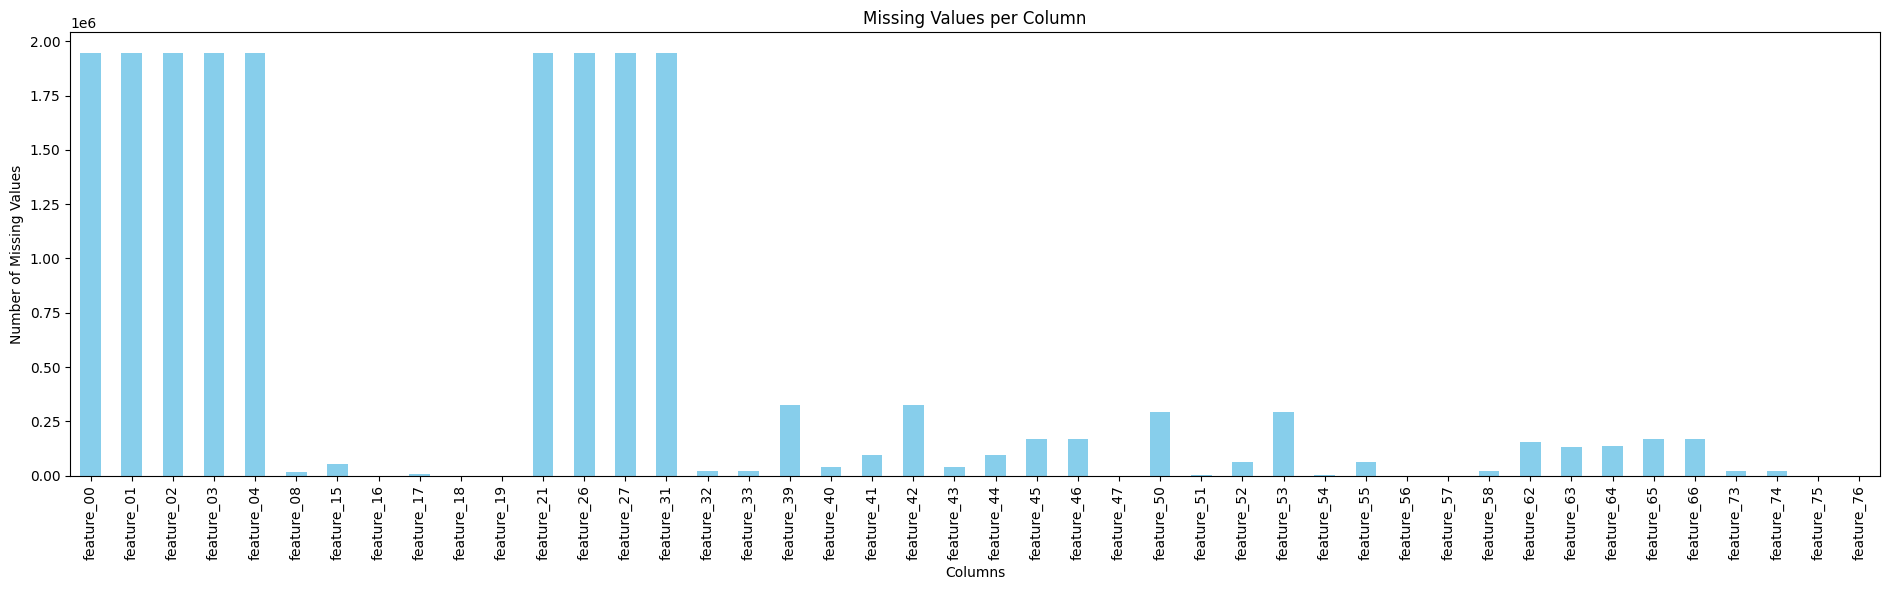

In [12]:
import matplotlib.pyplot as plt
missing_values = train_df.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Create a bar plot of missing values
plt.figure(figsize=(19, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
print(train_df.columns)

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65',
       'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_7

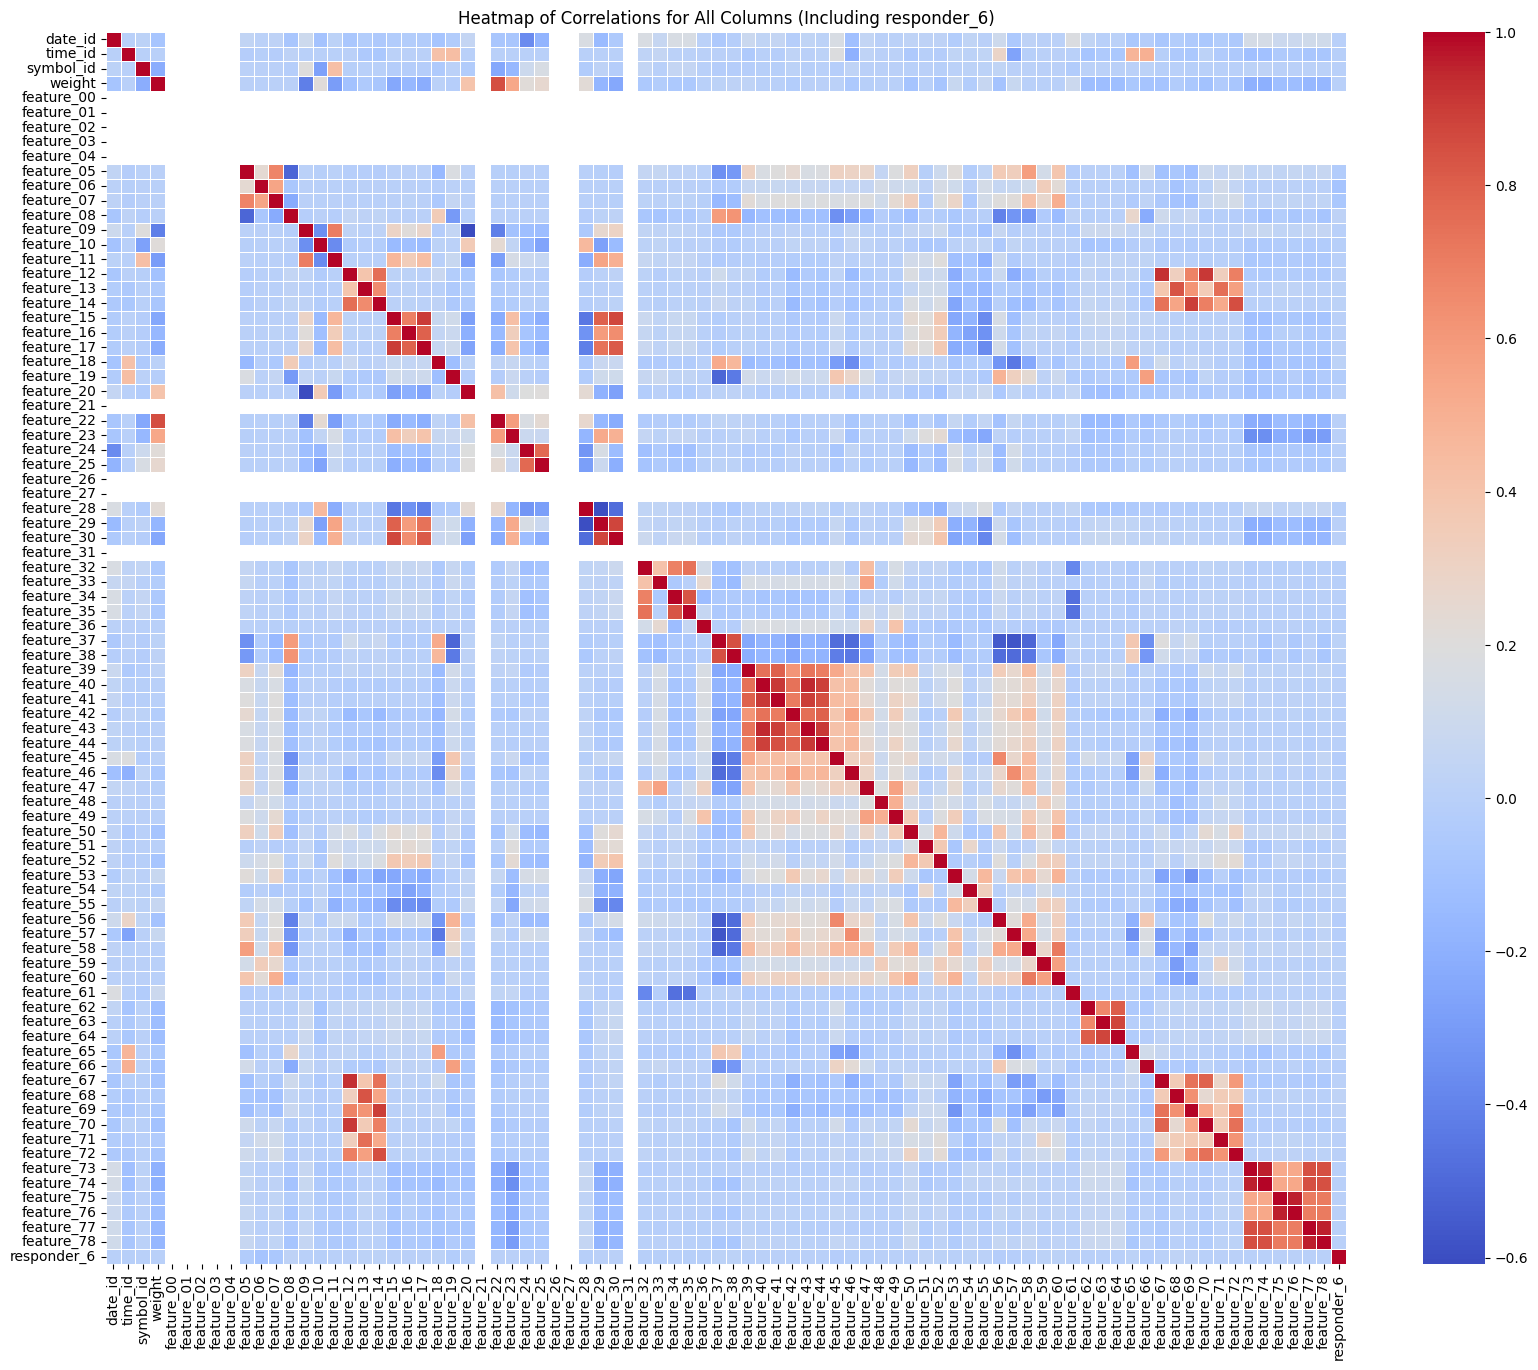

In [13]:
#let createa heatmap of correlations to understand the feature collinearity within the dataset :
import seaborn as sns
import matplotlib.pyplot as plt

# Drop all responder columns except responder_6
data = train_df.drop(columns=['responder_0', 'responder_1', 'responder_2', 'responder_3', 
                        'responder_4', 'responder_5', 'responder_7', 'responder_8'])

# Set up the figure size for a large heatmap
plt.figure(figsize=(20, 16))

# Generate the heatmap for the dataset correlations
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Heatmap of Correlations for All Columns (Including responder_6)')
plt.show()

In [ ]:
## Training a LGM Model for the training dataset to find out the feature importance by using the mode.This is an initial step in
##learning to get the best fit model and make transition to deep learning model using tensorflow.  #########

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Drop columns with all NaN values
train_df = train_df.dropna(axis=1, how='all')

# Step 2: Split the data into features and target
X = train_df.drop(columns=[ 'date_id', 'time_id',\
                           'feature_39','feature_40', 'feature_43',\
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',\
                           'feature_62', 'feature_63', 'feature_64','feature_65', 'feature_66','responder_6',\
                           'responder_3','responder_8','responder_7','responder_4','responder_5','responder_2',\
                           'feature_09','feature_06','feature_60','feature_07','feature_15', \
                           'feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_51',\
                           'feature_54','feature_56','feature_57','feature_59',\
                           'feature_61','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72',\
                           'feature_75','feature_76','feature_77','feature_78',\
                            'responder_0','responder_1'])  
# Features
y = train_df['responder_6']  # Target variable
print(X.columns)
# Step 3: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean
X = imputer.fit_transform(X)  # Apply imputer to the features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize and train the SGDRegressor model
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Index(['symbol_id', 'weight', 'feature_05', 'feature_08', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_41', 'feature_42', 'feature_44',
       'feature_50', 'feature_52', 'feature_53', 'feature_55', 'feature_58',
       'feature_73', 'feature_74'],
      dtype='object')
Mean Squared Error: 0.7590777978264924


In [28]:
#lets see the columsn present within the test_df 
print(test_df.columns)


Index(['row_id', 'time_id', 'symbol_id', 'weight', 'is_scored', 'feature_00',
       'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60'

In [31]:
#lets prediction the submision.csv file using the above lgbm model and then we can improve further ###
import pandas as pd

import pandas as pd

# Step 1: Drop unnecessary columns in the test dataset
# Columns to drop in test_df based on the columns that were dropped from train_df
columns_to_drop_in_test = ['is_scored','feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
                           'feature_51', 'feature_54', 'feature_56', 'feature_57', 'feature_59',
                           'feature_61', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 
                           'feature_71', 'feature_72', 'feature_75', 'feature_76', 'feature_77',
                           'feature_78','feature_00', 'feature_01', 'feature_02', 'feature_03','feature_04',\
                          'feature_06', 'feature_07', 'feature_09', 'feature_21','feature_21','feature_26','feature_27',\
                          'feature_31','feature_40','feature_43','feature_45','feature_46','feature_47',\
                          'feature_48','feature_49','feature_60','feature_62','feature_63','feature_64','feature_65',\
                          'feature_66', 'row_id', 'date_id', 'time_id','feature_15','feature_33','feature_39']

# Drop the columns from test_df that were not used in training
X_test_df = test_df.drop(columns=columns_to_drop_in_test)

# Step 2: Handle missing values in test_df using the same SimpleImputer from train_df
X_test_df = imputer.transform(X_test_df)  # Use the same imputer fitted on the training data

# Step 3: Standardize test_df using the same StandardScaler from train_df
X_test_df_scaled = scaler.transform(X_test_df)  # Use the same scaler fitted on the training data

# Step 4: Make predictions on the test_df using the trained model
y_test_pred = model.predict(X_test_df_scaled)

# Step 5: Create a DataFrame with 'id' column and the predictions
submission_df = pd.DataFrame({
    'row_id': test_df['row_id'],  # Use 'id' column from test_df as identifier
    'prediction': y_test_pred
})

# Step 6: Save the DataFrame as a CSV file for submission to Kaggle
submission_df.to_csv('submission.csv', index=False)
print(submission_df)
print("Submission file 'submission.csv' created successfully!")



    row_id  prediction
0        0   -0.016502
1        1   -0.013261
2        2   -0.016190
3        3   -0.015014
4        4   -0.012124
5        5   -0.014739
6        6   -0.009702
7        7   -0.020034
8        8   -0.014761
9        9   -0.010417
10      10   -0.014309
11      11   -0.012422
12      12   -0.016771
13      13   -0.014960
14      14   -0.010443
15      15   -0.010792
16      16   -0.019805
17      17   -0.017330
18      18   -0.013011
19      19   -0.024383
20      20   -0.009644
21      21   -0.010918
22      22   -0.010622
23      23   -0.012483
24      24   -0.012186
25      25   -0.012692
26      26   -0.010261
27      27   -0.017300
28      28   -0.011901
29      29   -0.010730
30      30   -0.012118
31      31   -0.010848
32      32   -0.010831
33      33   -0.010433
34      34   -0.017177
35      35   -0.010112
36      36   -0.009639
37      37   -0.011230
38      38   -0.020018
Submission file 'submission.csv' created successfully!


       Feature  Coefficient  Abs_Coefficient
2   feature_05    -0.045527         0.045527
12  feature_19    -0.035264         0.035264
29  feature_58     0.030580         0.030580
28  feature_55     0.020904         0.020904
23  feature_42    -0.018567         0.018567
27  feature_53    -0.017904         0.017904
7   feature_13    -0.016195         0.016195
6   feature_12    -0.015997         0.015997
24  feature_44     0.013875         0.013875
3   feature_08    -0.013866         0.013866
31  feature_74    -0.012526         0.012526
9   feature_16    -0.011995         0.011995
10  feature_17     0.011717         0.011717
25  feature_50    -0.011004         0.011004
19  feature_29    -0.009568         0.009568
13  feature_20     0.009380         0.009380
17  feature_25    -0.008708         0.008708
18  feature_28    -0.008473         0.008473
21  feature_32    -0.008201         0.008201
11  feature_18     0.006397         0.006397
20  feature_30    -0.005923         0.005923
4   featur

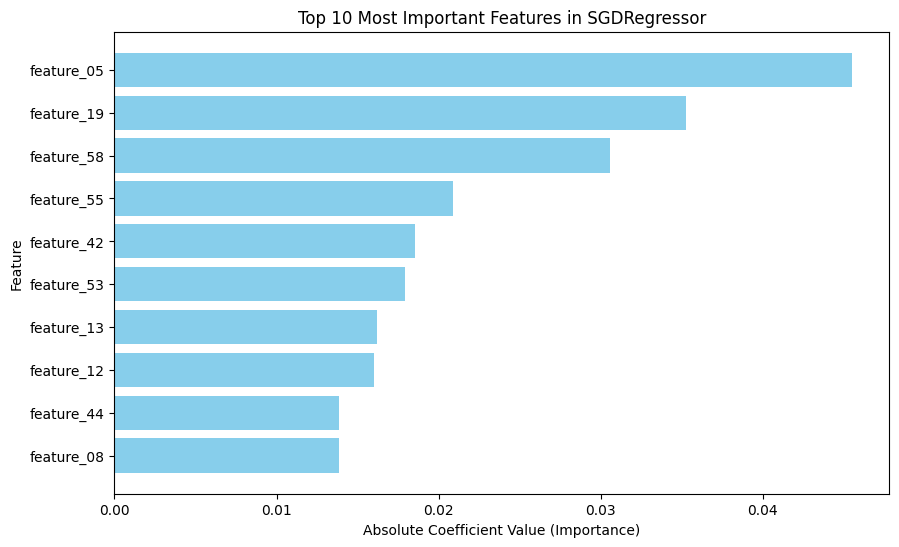

In [33]:
# Step 9: Get feature importance (coefficients)
import matplotlib.pyplot as plt
coefficients = model.coef_

# Step 10: Create a DataFrame to display feature importance
features_df = pd.DataFrame({
    'Feature': train_df.drop(columns=[ 'date_id', 'time_id',\
                           'feature_39','feature_40', 'feature_43',\
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',\
                           'feature_62', 'feature_63', 'feature_64','feature_65', 'feature_66','responder_6',\
                           'responder_3','responder_8','responder_7','responder_4','responder_5','responder_2',\
                           'feature_09','feature_06','feature_60','feature_07','feature_15', \
                           'feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_51',\
                           'feature_54','feature_56','feature_57','feature_59',\
                           'feature_61','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72',\
                           'feature_75','feature_76','feature_77','feature_78',\
                            'responder_0','responder_1']).columns,
    'Coefficient': coefficients
})

# Step 11: Sort by absolute coefficient value to get the most important features
features_df['Abs_Coefficient'] = features_df['Coefficient'].abs()
top_features = features_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted feature importance
print(top_features)

# Step 12: Optionally, visualize the top 10 features
top_10_features = top_features.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in SGDRegressor')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [35]:
# Step 6: Get and print the coefficients (these represent the model weights)
coefficients = model.coef_

# Display the coefficients
print("Model Coefficients (Weights):")
for feature, coef in zip(train_df.drop(columns=['date_id', 'time_id']).columns, coefficients):
    print(f"{feature}: {coef}")

Model Coefficients (Weights):
symbol_id: -0.0001453923323424533
weight: -0.0031424888875335455
feature_05: -0.0455271378159523
feature_06: -0.013866444118320942
feature_07: 0.005786721128970385
feature_08: 0.0028091336134821177
feature_09: -0.01599663309752941
feature_10: -0.016195258125662804
feature_11: -0.002804884919896722
feature_12: -0.011994861997663975
feature_13: 0.011716813780367374
feature_14: 0.006397097371518612
feature_15: -0.0352640338242054
feature_16: 0.009380360133945942
feature_17: -0.0007893158472143114
feature_18: -0.001174347591586411
feature_19: -0.0035987936425954103
feature_20: -0.008707554079592228
feature_22: -0.008473210968077183
feature_23: -0.009568238630890846
feature_24: -0.005923034623265266
feature_25: -0.00820081029087305
feature_28: 0.002404063008725643
feature_29: -0.018567103892564774
feature_30: 0.013874675147235394
feature_32: -0.011003557592630386
feature_33: 0.0036296609323471785
feature_34: -0.01790427602827549
feature_35: 0.02090439572930336


In [ ]:
##Training a tensorflow model to run it on GPU as well instead of just running on TPU as the above model is memory intensive 
##we need to more efficient model and this will definitely work .Tensorflow is generatiev AI framework. ######

In [ ]:
import tensorflow as tf

# Verify TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Create a simple constant tensor and print it
hello = tf.constant("Hello, TensorFlow!")
print(hello)

# Start a simple session
tf.print(hello)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input

# Step 1: Drop columns with all NaN values
train_df = train_df.dropna(axis=1, how='all')

# Step 2: Split the data into features and target
X = train_df.drop(columns=['partition_id', 'date_id', 'time_id', 'id', 
                           'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 
                           'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 
                           'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'responder_6', 
                           'responder_3', 'responder_8', 'responder_7', 'responder_4', 'responder_5', 'responder_2', 'feature_09'])  # Features
y = train_df['responder_6']  # Target variable

# Step 3: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean
X = imputer.fit_transform(X)  # Apply imputer to the features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model using the Input layer
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(64, activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set (flatten the output for evaluation)
y_pred = model.predict(X_test_scaled).flatten()  # Flatten to convert 2D to 1D

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
